In [1]:
from IH_main import *
import matplotlib.pyplot as plt
from IH_data_analysis import Insert_Halo_Data_Analysis

/home/gomesu/workspace/Insert_Halo/Insert_Halo_v0.12/sashimi_si.py:232: SyntaxWarning: invalid escape sequence '\s'
  \frac{d\sigma}{d\cos\theta} = \frac{\sigma_0 w^4}{2(w^2+v^2\sin^2(\theta/2))^2}
/home/gomesu/workspace/Insert_Halo/Insert_Halo_v0.12/sashimi_si.py:301: SyntaxWarning: invalid escape sequence '\s'
  \sigma_{eff} = \frac{1}{512 \nu_{eff}^8} \int v^2 dv \int d\cos\theta \frac{d\sigma}{d\cos\theta} v^5 \sin^2\theta \exp(-v^2/4\nu_{eff}^2)


In [2]:
# Running just pyHalo (idle_run = True and nph_subhalos = None)

HC_ph = run_insert_halo(zlens = 0.5, zsource = 2.5, DM_type = "CDM", Mhost = 13.3, geometry_shape = "DOUBLE_CONE", cone_angle_arcsec = 10,
                      idle_run = True, randomization = False, seed = None, LOS_normalization = 1, 
                        host_halo_scale_factor = 0.88, redshift_scale_factor = 1.7, fix_mass_range_sh = True, msub_min = 6, 
                        correlated_clustering = True, nph_subhalos = None)

Initializing Sashimi-CDM
Running pyHalo-CDM


In [3]:
masses_ph = []
c_ph = []

for halo in HC_ph.PH.cdm.subhalos:
    masses_ph.append(halo.mass)
    c_ph.append(halo.c)

In [4]:
HC_sh = run_insert_halo(zlens = 0.5, zsource = 2.5, DM_type = "CDM", Mhost = 13.3, geometry_shape = "DOUBLE_CONE", cone_angle_arcsec = 10,
                      idle_run = False, randomization = False, seed = None, LOS_normalization = 1, 
                        host_halo_scale_factor = 0.88, redshift_scale_factor = 1.7, fix_mass_range_sh = True, msub_min = 6, 
                        correlated_clustering = True)

Running Sashimi-CDM


Calculating subhalo properties: 100%|██████████| 128/128 [00:27<00:00,  4.60it/s]


Running pyHalo-CDM


In [5]:
masses_sh = []
c_sh = []

for halo in HC_sh.PH.cdm.subhalos:
    masses_sh.append(halo.mass)
    c_sh.append(halo.c)

Text(0, 0.5, 'c')

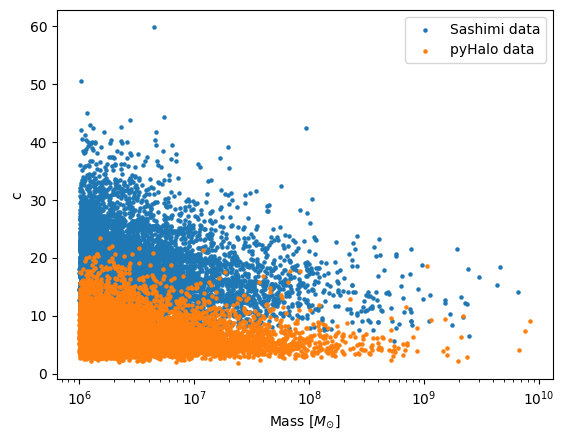

In [6]:
plt.scatter(masses_sh, c_sh, label = "Sashimi data", s = 5)
plt.scatter(masses_ph, c_ph, label = "pyHalo data", s = 5)
plt.xscale("log")
plt.legend()
plt.xlabel(r"Mass [$M_{\odot}$]")
plt.ylabel("c")